In [1]:
%matplotlib inline
import os

import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

### Распределение дозы по глубине

In [2]:
paths = glob.glob(f"build/*results*.csv")

In [6]:
data = pd.DataFrame()

for path in paths:
    item = pd.read_csv(path, skiprows=12, names=['name', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'E'])
    data = data.append(item, ignore_index=True)

/tmp/ipykernel_11267/3239030270.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(item, ignore_index=True)
/tmp/ipykernel_11267/3239030270.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(item, ignore_index=True)
/tmp/ipykernel_11267/3239030270.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(item, ignore_index=True)
/tmp/ipykernel_11267/3239030270.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(item, ignore_index=True)
/tmp/ipykernel_11267/3239030270.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futu

In [7]:
data

,name,x,y,z,vx,vy,vz,E
0,gamma,-16.794000,-15.748500,42.0000,-0.806664,-0.776350,2.089580,2.370610
1,gamma,19.620400,6.591690,42.0000,0.588351,0.304784,1.624040,1.754010
2,gamma,-19.114000,19.615100,42.0000,-4.227880,4.346390,9.386260,11.174400
3,gamma,5.626820,15.470700,42.0000,0.122308,0.355415,0.970732,1.040960
4,gamma,-16.699800,-17.653300,42.0000,-1.450740,-1.466940,3.416410,3.991040
...,...,...,...,...,...,...,...,...
767,gamma,-0.027773,0.443903,42.0000,-0.017264,0.026405,2.139560,1.701960
768,e-,-0.136012,0.609457,55.4144,0.104991,0.585137,0.534518,0.412967
769,gamma,0.584124,17.149700,42.0000,0.025602,1.282540,3.051630,3.310290
770,gamma,17.998000,11.811000,42.0000,0.698847,0.497283,1.975320,2.153510


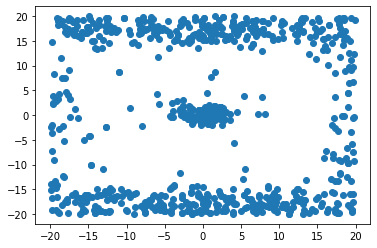

In [8]:
plt.scatter(data['x'], data['y'])

In [36]:
center = data[(-5 < data['x']) & (data['x'] < 5) & (-5 < data['y']) & (data['y'] < 5)]

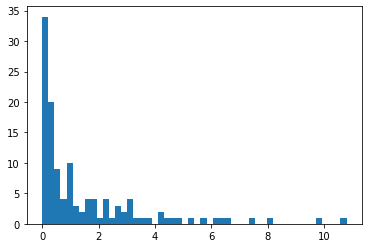

In [37]:
plt.hist(center['E'], bins=50)
plt.show()

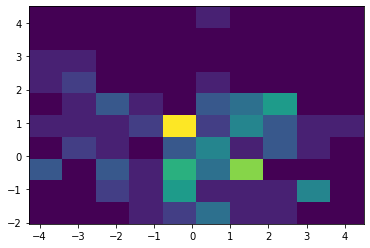

In [38]:
plt.hist2d(center['x'], center['y'], bins=10)
plt.show()

In [4]:
data = data.sort_values(by=['name'], ascending=False)

In [5]:

data['z'] -= data['z'].min()
z_bins = 300
dz = (data['z'].max() - data['z'].min()) / z_bins

In [6]:
data_dict = []
for i in np.arange(data['z'].min(), data['z'].max(), dz):
    data_dict.append({'z': i + dz / 2, 'edep': data[(data['z'] > i) & (data['z'] < (i + dz))]['edep'].sum()})

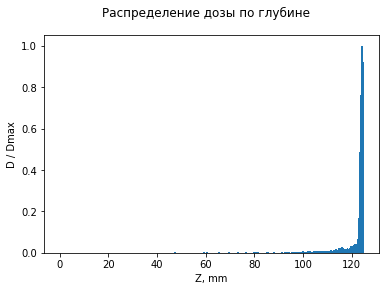

In [7]:
hist = pd.DataFrame(data_dict)
hist['edep'] /= hist['edep'].max()

d2plot = hist['edep'].values[::-1]
plt.bar(np.arange(len(d2plot)) * dz + dz / 2, d2plot)

hist['z'] = hist['z'].values[::-1]
#hist.sort_values(by=['z']).to_csv('aDoseDepthHist.csv', index=False)
plt.ylabel('D / Dmax')
plt.xlabel('Z, mm')
plt.suptitle('Распределение дозы по глубине')
#plt.savefig('aDoseDepthHist.png')

### Распределение по энергии и типу частиц

In [8]:
paths = glob.glob(f"build/*DoseData_t*.csv")

In [9]:
data = pd.DataFrame()

for path in paths:
    item = pd.read_csv(path, skiprows=8, names=['particle_name', 'energy'])
    data = data.append(item, ignore_index=True)

In [10]:
particle_names = [name for name in set(data["particle_name"].values) if not name.startswith("W")]
datas = {}
for name in particle_names:
    if name.startswith("W") is False:
        datas[name] = data[data["particle_name"]==name]

In [11]:
particle_names

['gamma', 'e+', 'e-']

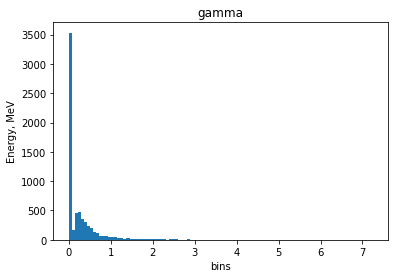

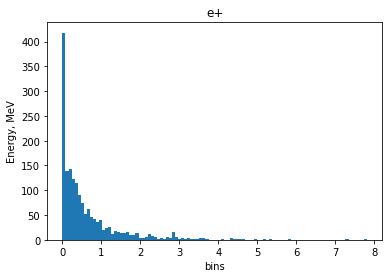

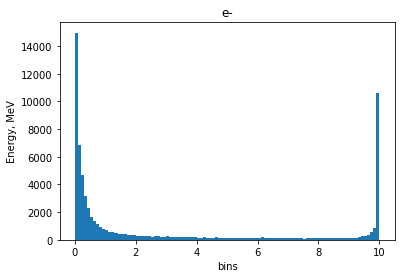

In [12]:
for name in particle_names:
    d = datas[name]["energy"].to_numpy()
    plt.hist(d, bins=100)
    plt.title(name)
    plt.ylabel('Energy, MeV')
    plt.xlabel('bins')
    plt.show()